## Curve fitting example with Covalent

In [1]:
import numpy as np
import covalent as ct
import matplotlib.pyplot as plt

### Raw code

```python
x = [1, 2, 3, 9]
y = [1, 4, 1, 3]
```

### Fit
```python
fit = np.polyfit(x, y, 3)
xnew = np.linspace(x[0], x[-1], 50)
ynew = fit(xnew)
```


# plot
```python
fig, ax = plt.subplots()
plt.plot(x, y, 'o', xnew, ynew)
plt.xlim(x[0]-1, x[-1]+1)
```

### Functionalize the code (structured)

In [2]:
def fit_xy(x, y):
    z = np.polyfit(x, y, 3)
    return np.poly1d(z)

def plot_fit(x, y, xnew, fit):
    ynew = fit(xnew)
    fig, ax = plt.subplots()
    plt.plot(x, y, 'o')
    plt.plot(xnew, ynew, '-')
    plt.xlim([x[0]-1, x[-1]+1])
    return ax

def exp(x, y):
    xnew = np.linspace(x[0], x[-1], 50)
    fit = fit_xy(x=x, y=y)
    return plot_fit(x=x, y=y, xnew=xnew, fit=fit)

## Covalentify workflow

### Make `fit_xy` electron

In [7]:
@ct.electron
def fit_xy(x, y):
   z = np.polyfit(x, y, 3)
   return np.poly1d(z)

### Make an electron to plot the results

In [8]:
@ct.electron
def plot_fit(x, y, xnew, fit):
   ynew = fit(xnew)
   fig, ax = plt.subplots()
   plt.plot(x, y, 'o')
   plt.plot(xnew, ynew, '-')
   plt.xlim([x[0]-1, x[-1]+1])
   return ax

### Create lattice for curve fitting (workflow)

In [9]:
@ct.lattice
def exp(x, y):
   xnew = np.linspace(x[0], x[-1], 50)
   fit = fit_xy(x=x, y=y)
   return plot_fit(x=x, y=y, xnew=xnew, fit=fit)

### Dispatch workflow to covalent server (localhost:48008)

In [4]:
dispatch_id = ct.dispatch(exp)(x = [1,2,3,9], y = [1, 4, 1, 3])
print(dispatch_id)

af9a3314-e377-40b0-9395-752f4f86f004


[Covalent Server UI](http://localhost:48008)

### Curve fitting workflow

![Curve fitting](./assets/curve_fitting.png)

In [5]:
result = ct.get_result(dispatch_id=dispatch_id, wait=True)


Lattice Result
status: COMPLETED
result: AxesSubplot(0.125,0.11;0.775x0.77)
input args: []
input kwargs: {'x': '[1, 2, 3, 9]', 'y': '[1, 4, 1, 3]'}
error: 

start_time: 2022-09-05 14:27:08.843380
end_time: 2022-09-05 14:27:10.660647

results_dir: /home/venkat/tutorials_covalent_ieee_2022/notebooks/curve_fitting/results
dispatch_id: af9a3314-e377-40b0-9395-752f4f86f004

Node Outputs
------------
fit_xy(0):         3         2
0.4345 x - 5.607 x + 16.78 x - 10.61
:electron_list:(1): [1, 2, 3, 9]
:parameter:1(2): 1
:parameter:2(3): 2
:parameter:3(4): 3
:parameter:9(5): 9
:electron_list:(6): [1, 4, 1, 3]
:parameter:1(7): 1
:parameter:4(8): 4
:parameter:1(9): 1
:parameter:3(10): 3
plot_fit(11): AxesSubplot(0.125,0.11;0.775x0.77)
:electron_list:(12): [1, 2, 3, 9]
:parameter:1(13): 1
:parameter:2(14): 2
:parameter:3(15): 3
:parameter:9(16): 9
:electron_list:(17): [1, 4, 1, 3]
:parameter:1(18): 1
:parameter:4(19): 4
:parameter:1(20): 1
:parameter:3(21): 3
:parameter:[1.         1.16326531 1.3

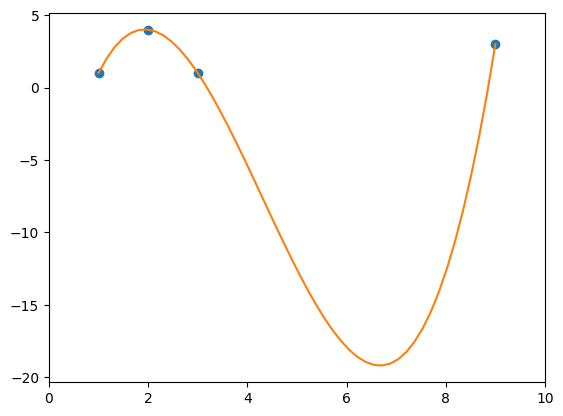

In [6]:
print(result)